# 회귀나무(Decision Tree Regressor)
#### **사후 가지치기**
: 나무가 완성된 후에 하단 노드부터 유의미하지 않다고 판단되는 Subtree를 끝노드로 변환시키는 방법    

#### [Cost Complexity Pruning](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html)    
$R_\alpha(T) = R(T) + \alpha\vert T \vert$

  - 위의 비용복잡도(Cost complexity) 식을 최소화 시키는 과정(CCP)
  - Weakest link pruning이라고도 한다.
  - 가지가 있을 때와 처낼 때 불순도의 차이가 거의 없는 가지(Weakest Link)를 가지치기하는 메커니즘
  - 모든 Subtree를 고려하진 않아 Local Minima에 빠질 수 있다.

    
참고 : https://zephyrus1111.tistory.com/131

### 1. 데이터 로드 및 전처리

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib
#한글꺠짐 방지
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [2]:
data=pd.read_csv("./data/Fault_data.csv",encoding="EUC-KR")
data.drop(["자재구분","END_DATE_TIME"],axis=1,inplace=True)
data.dropna(axis=1,inplace=True)

#X,Y 분할
Y=data["Y"].copy()
X=data.drop("Y",axis=1)
X.head(3)

,CHAMBER,TAE.STDDEV0,TAE.MEAN0,TAE.RANGE0,PC.STDDEV0,PC.MEAN0,PC.RANGE0,CROT.STDDEV0,CROT.MEAN0,CROT.RANGE0,...,PC.RANGE12,TAE.STDDEV9,TAE.MEAN9,TAE.RANGE9,CROT.STDDEV9,CROT.MEAN9,CROT.RANGE9,PC.STDDEV9,PC.MEAN9,PC.RANGE9
0,4,0.044554,38.083127,0.254154,0.124753,0.044329,0.439883,0,35,0,...,17.350926,0.032832,35.011650,0.127077,0,35,0,0.405343,45.124841,3.079182
1,2,0.034801,38.052395,0.063538,0.177575,0.342131,0.439883,0,27,0,...,1.466280,0.020858,35.550245,0.063540,0,27,0,1.923012,45.350277,15.004887
2,3,0.030089,38.046407,0.127080,0.137559,0.063983,0.488759,0,15,0,...,13.098728,0.021635,36.013373,0.063538,0,15,0,0.161640,45.071393,0.977516


### 2. 평가 지표 함수

In [3]:
# 평가 지표 출력 함수
def print_all_reg(Y_test,pred):
    print("model의 MSE 값은 {:.3f}".format(mean_squared_error(Y_test,pred)))
    print("model의 MAE 값은 {:.3f}".format(mean_absolute_error(Y_test, pred)))
    print("model의 MAPE 값은 {:.3f}".format(mean_absolute_percentage_error(Y_test, pred)))
    print("model의 r2 값은 {:.3f}".format(r2_score(Y_test, pred)))

### 3. 모델 학습 및 예측

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2,shuffle =True)

[[numpy.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)] np.linspace(start, stop, num=50, endpoint=True)
- start : 구간 시작점
- stop : 구간 끝 점
- num : 숫자 개수
- endpoint : 구간 끝 점 포함 여부

In [5]:
from sklearn.tree import DecisionTreeRegressor

ccp_alpha_list = np.linspace(0, 1000, num=500) # 0부터 1000까지 등간격으로 500개의 수 출력
ccp_alpha_list2 = np.linspace(0, 1000, num=500) # 0부터 1000까지 등간격으로 500개의 수 출력
train_scores =[]
test_scores =[]
for alpha in ccp_alpha_list:
    clf = DecisionTreeRegressor(ccp_alpha= alpha,max_depth = 500)  # ccp_alpha 값보다 작으면서 비용복잡도가 가장 큰 Subtree, 최대 깊이 500 설정
    clf.fit(X_train,Y_train) # 훈련 데이터로 트리 학습
    
    preds_train = clf.predict(X_train)
    preds = clf.predict(X_test)
    
    train_scores.append(mean_absolute_error(Y_train,preds_train))  # train score 저장, 평가지표 MAE
    test_scores.append(mean_absolute_error(Y_test,preds)) # test score 저장, 평가지표 MAE

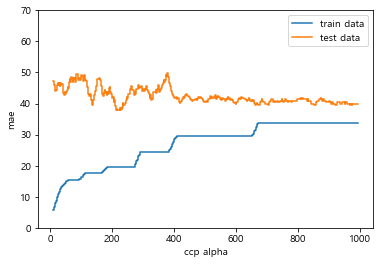

In [39]:
fig, ax = plt.subplots()
ax.set_xlabel("ccp alpha")
ax.set_ylabel("mae")
#ax.set_title("나무 복잡도 증가에 따른 오분류율 그래프")
ax.plot(ccp_alpha_list, pd.Series(train_scores).rolling(10,center =True).mean(),  label="train data", drawstyle="steps-post") #train_socres 데이터 10개단위로 이동평균, 중심점은 5번째 데이터
ax.plot(ccp_alpha_list, pd.Series(test_scores).rolling(10,center=True).mean(),  label="test data", drawstyle="steps-post")

#ax.plot(ccp_alpha_list, train_scores, drawstyle="steps-post")
#ax.plot(ccp_alpha_list, test_scores, drawstyle="steps-post")

ax.legend()
plt.ylim(0,70)
plt.show()
plt.close('all')

In [41]:
alpha = 43
clf = DecisionTreeRegressor(ccp_alpha= alpha)  
clf.fit(X_train,Y_train)
preds = clf.predict(X_test)

preds_train = clf.predict(X_train) # X_train데이터와 학습한 모델로 예측값 생성

print_all_reg(Y_train,preds_train) # Y_train값과 예측값을 비교하여 모델 성능지표 출력
print("")
print_all_reg(Y_test,preds) # 실제 Y_test값과 예측값을 비교하여 모델 성능지표 출력

model의 MSE 값은 347.904
model의 MAE 값은 14.069
model의 MAPE 값은 0.413
model의 r2 값은 0.913

model의 MSE 값은 4134.683
model의 MAE 값은 38.448
model의 MAPE 값은 0.858
model의 r2 값은 -0.025
